#**TP2: Redes Neurais Convolucionais**

### **Introdução**
Nesta tarefa de programação, você implementará uma Rede Neural Convolucional (CNN) em Python com a biblioteca PyTorch para classificar imagens de dígitos manuscritos. Como parte desse processo, você escreverá suas próprias camadas personalizadas de Convolução e MaxPooling. Em seguida, você usará essas camadas para construir uma rede LeNet-5. Você treinará sua LeNet-5 com o conjunto de dados clássico MNIST, que é grande o suficiente para justificar o treinamento com gradiente descendente em minilotes. Ao final desta tarefa, você verá como a LeNet-5 pode atingir alta precisão na classificação de imagens de dígitos manuscritos.

### **Objetivo**

O principal objetivo deste projeto é praticar a implementação de CNNs no PyTorch, incluindo carregamento do conjunto de dados, implementação de camadas personalizadas, treinamento com gradiente descendente e avaliação dos modelos treinados.

### **Instruções**

Diferentemente das tarefas anteriores, desta vez você não será informado exatamente onde escrever seu código, mas receberá assinaturas de classes e funções que poderá implementar da maneira que desejar. No entanto, você ainda terá células de teste com os resultados esperados, para que possa verificar se sua solução está no caminho certo.

### **Parte 0: Importar bibliotecas**

Ao contrário das outra tarefa prática, no TP2 você não importará `numpy`, mas sim `torch`, para carregar as funcionalidades do PyTorch. Você também carregará as seguintes bibliotecas auxiliares:

- **torch.utils.data.DataLoader**: classe para criar um carregador de dados baseado em conjuntos de dados personalizados.
- **torchvision.datasets**: conjuntos de dados de visão computacional integrados.
- **torchvision.transforms**: conjunto de funções para transformar imagens.
- **matplotlib**: biblioteca principal para plotagem de gráficos em Python.

In [ ]:
import torch
import time
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

### **Parte 1: Carregar o conjunto de dados MNIST**

Implemente a função `load_mnist` para carregar o conjunto de dados MNIST com a função `datasets.MNIST()` do módulo `torchvision.datasets`. Esta função retornará objetos do conjunto de dados. Você precisará criar um desses objetos para o conjunto de treinamento e outro para o conjunto de teste. Você pode usar `transforms.ToTensor()` e `transforms.Normalize()` para converter as imagens em tensores e normalizá-las, respectivamente. Aplique essas transformações a ambos os conjuntos. Ao chamar a função `datasets.MNIST`, você terá que passar essas duas transformações em um único argumento. Você pode usar `transforms.Compose` para compor essas duas transformações em uma única lista de transformações.

Após carregar os conjuntos de treinamento e teste, crie o `Dataloader` para cada um deles. Esses carregadores de dados ajudam a gerar minilotes no momento do treinamento. Observe que `batch_size` é um argumento da função `load_mnist`. Use este argumento para criar os carregadores de dados. Certifique-se de definir os parâmetros `shuffle` do carregador de dados de treinamento como true, pois queremos embaralhar os dados antes de cada período da descida do gradiente do minilote. Você **não** precisa embaralhar o conjunto de teste. Sua função precisa retornar dois carregadores de dados, um para o conjunto de treinamento e outro para o conjunto de teste.

In [ ]:
def load_mnist(batch_size=32) -> tuple[DataLoader, DataLoader]:
    pass

In [ ]:
# define a semente aleatória
torch.manual_seed(42)

# carrega o dataset MNIST
train_loader, test_loader = load_mnist(batch_size=16)

# imprime o número de amostras no conjunto de treino e conjunto de teste
print(f"Número de exemplos de treinamento: {len(train_loader.dataset)}")
print(f"Número de exemplos de teste: {len(test_loader.dataset)}")

# pega um lote de dados
data, target = next(iter(test_loader))

# seleciona um index para ver a imagem
index = 10

# visualiza parte da imagem
print(f"Pixels de amostra da imagem  [{index}]: {data[index].numpy().squeeze()[10][:10]}")

**Resultados Esperados:**
<table style="width:50%">
  <tr>
    <td>Número de exemplos de treinamento</td>
    <td>60000</td>
  </tr>
  <tr>
    <td>Número de exemplos de teste</td>
    <td>10000</td>
  </tr>
    <tr>
    <td>Pixels de amostra da imagem [10]</td>
    <td>[-0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296
 -0.42421296 -0.42421296  2.0450644   2.8087585 ]</td>
  </tr>
</table>

## **Parte 2: Rede Neural Convolucional**

No Pytorch, camadas de rede neural e modelos completos são implementados estendendo a classe `torch.nn.Module`. Há dois métodos principais que você precisa implementar ao criar um novo modelo: `__init__` para inicializar os atributos do seu modelo e `forward`, que executará a propagação para frente do seu modelo.

#### **2.1 Uma primeira camada de convolução**

A primeira camada que você implementará é a Camada de Convolução com stride e padding. Os principais atributos que você precisa considerar são o número de canais de entrada `in_channels`, o número de canais de saída `out_channels`, o tamanho do kernel `kernel_size`, o tamanho do stride `stride` e o tamanho do padding `padding`.

1. `__init__`: Crie os pesos (filtros) e um vetor de viés usando a função `torch.nn.Parameter`. O tamanho do seu tensor de filtro deve ser `(out_channels, in_channels, kernel_size, kernel_size)`. Você pode inicializar os pesos com a função `torch.randn`. Salve também os valores dos parâmetros usando atributos para usá-los em `forward`.

2. `forward(x)`: executa a propragação em um minilote `x` de tamanho `(batch_size, in_channels, in_height, in_width)`. Esta operação deve suportar preenchimento (consulte `torch.nn.functional.pad`) e passos de qualquer tamanho. Para isso, você terá que calcular a largura de saída $w_o$ e $h_o$ usando a fórmula que vimos em aula:

$
\begin{align}
w_o = \frac{w_i + 2p - f}{s} + 1 \\
h_o = \frac{h_i + 2p - f}{s} + 1
\end{align}
$

onde $w_i$ é a largura da imagem de entrada, $h_i$ é a altura da imagem de entrada, $p$ é o tamanho do preenchimento, $f$ é o tamanho do filtro e $s$ é o tamanho do passo.

Com $w_o$ e $h_o$ calculados, você pode implementar a convolução com 4 laços for: 1 sobre o tamanho do lote, 1 sobre o número de filtros, 1 sobre a altura de saída e 1 sobre a largura de saída. Certifique-se de que o tensor de saída tenha o tamanho `(batch_size, out_channels, out_height, out_width)`

In [ ]:
class CustomConv2d(torch.nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride=1, padding=0):
        """
        Inicializa pesos, bias e hiperparâmetros da camada convolucional

        Argumentos:
        in_channels (int): número de canais de entrada
        out_channels (int): número de canais de saída
        kernel_size (int): tamanho do kernel
        stride (int): tamanho do passo
        padding (int): tamanho do preenchimento
        """
        super(CustomConv2d, self).__init__()
        pass

    def forward(self, x):
        """
        Executa a propragação direta de uma camada de convolução em um minilote x

        Argumentos:
        x ​​(torch.Tensor): minilote de imagens de tamanho (tamanho_do_lote, canais_de_entrada, altura_de_entrada, largura_de_entrada)

        Retorna:
        torch.Tensor: saída da camada convolucional de tamanho (tamanho_do_lote, canais_de_saída, altura_de_saída, largura_de_saída)
        """
        pass

In [ ]:
# define a semente aleatória
torch.manual_seed(42)

# cria uma instância da sua camada convolucional customizada
custom_conv = CustomConv2d(in_channels=1, out_channels=6, kernel_size=5)

# mostra a saída para um único exemplo do dataset
first_batch = next(iter(test_loader))[0]

# pega uma imagem no minilote
first_image = first_batch[0]
output_custom_conv = custom_conv(first_image.unsqueeze(0))

# mostra uma amostra de saída
print("Tamanho da saída:", output_custom_conv.size())
print("Amostra de saída:", output_custom_conv[:,:,0,0])

**Resultados Esperados:**
<table style="width:50%">
  <tr>
    <td>Tamanho da saída</td>
    <td>[1, 6, 24, 24]</td>
  </tr>
  <tr>
    <td>Amostra de saída</td>
    <td>[[-0.3627,  2.7504, -2.1521,  1.8907, -2.4571,  1.1121]]</td>
  </tr>
</table>

In [ ]:
# define a semente aleatória
torch.manual_seed(42)

# cria uma instância da sua camada de convolução personalizada
custom_conv = CustomConv2d(in_channels=1, out_channels=6, kernel_size=5)

# compara com a camada convolucional 2d do pytorch
pytorch_conv = torch.nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)

# propagação pra frente das duas redes
first_batch = next(iter(test_loader))[0]

# mede o tempo de execução de cada uma
t1 = time.perf_counter()
output_custom_conv = custom_conv(first_batch)
t2 = time.perf_counter()

print(f"Tempo gasto pela conversão personalizada: {t2-t1:.4f} segundos")

t1 = time.perf_counter()
output_pytorch_conv = pytorch_conv(first_batch)
t2 = time.perf_counter()

print(f"Tempo gasto pela conversão do pytorch: {t2-t1:.4f} segundos")

#### **2.2 Vetorizando a operação de convolução**

Como demonstrado no experimento acima, implementar convoluções com 4 loops for é muito lento. Um único minilote de tamanho 16 leva mais de 3 segundos para ser executado, portanto, o treinamento em todo o conjunto de dados MNIST levaria aproximadamente $15 * (60000/3) = 20000$ segundos $= 5,5$ horas. Isso é um tempo muito longo, considerando que as imagens MNIST têm apenas 28x28 pixels. Podemos reduzir esse tempo consideravelmente implementando a operação de convolução com vetorização (como a implementação do Pytorch). Para isso, precisamos primeiro gerar os blocos para cada etapa da convolução e, em seguida, multiplicá-los pelo kernel em paralelo. Na próxima célula, altere sua célula `CustomConv2d` para usar vetorização. Você pode usar a função `torch.nn.functional.unfold` do Pytorch para gerar os blocos para cada etapa da convolução. O método `view` de tensores pode ser útil aqui também, para remodelar os tensores.

In [ ]:
class CustomConv2d(torch.nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride=1, padding=0):
        """
        Inicializa pesos, bias e hiperparâmetros da camada convolucional

        Argumentos:
        in_channels (int): número de canais de entrada
        out_channels (int): número de canais de saída
        kernel_size (int): tamanho do kernel
        stride (int): tamanho do passo
        padding (int): tamanho do preenchimento
        """
        super(CustomConv2d, self).__init__()
        pass

    def forward(self, x):
        """
        Executa a propagação direta de uma camada de convolução em um minilote x

        Argumentos:
        x ​​(torch.Tensor): minilote de imagens de tamanho (tamanho_do_lote, canais_de_entrada, altura_de_entrada, largura_de_entrada)

        Retorna:
        torch.Tensor: saída da camada convolucional de tamanho (tamanho_do_lote, canais_de_saída, altura_de_saída, largura_de_saída)
        """
        pass

In [ ]:
# define a semente aleatória
torch.manual_seed(42)

# cria uma instância da sua camada de convolução personalizada
custom_conv = CustomConv2d(in_channels=1, out_channels=6, kernel_size=5)

# mostra a saída para um único exemplo do dataset
first_batch = next(iter(test_loader))[0]

# pega uma imagem no minilote
first_image = first_batch[0]
output_custom_conv = custom_conv(first_image.unsqueeze(0))

# mostra uma amostra de saída
print("Tamanho da saída:", output_custom_conv.size())
print("Amostra de saída:", output_custom_conv[:,:,0,0])

**Resultados Esperados:**
<table style="width:50%">
  <tr>
    <td>Tamanho da saída</td>
    <td>[1, 6, 24, 24]</td>
  </tr>
  <tr>
    <td>Amostra de saída</td>
    <td>[[-0.3627,  2.7504, -2.1521,  1.8907, -2.4571,  1.1121]]</td>
  </tr>
</table>

In [ ]:
# define a semente aleatória
torch.manual_seed(42)

# cria uma instância de sua camada convolucional customizada
custom_conv = CustomConv2d(in_channels=1, out_channels=6, kernel_size=5)

# compara com a camada convolucional 2d do pytorch
pytorch_conv = torch.nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)

# propagação pra frente das duas redes
first_batch = next(iter(test_loader))[0]

# mede o tempo de execução de cada uma
t1 = time.perf_counter()
output_custom_conv = custom_conv(first_batch)
t2 = time.perf_counter()

print(f"Tempo gasto pela conversão personalizada: {t2-t1} segundos")

t1 = time.perf_counter()
output_pytorch_conv = pytorch_conv(first_batch)
t2 = time.perf_counter()

print(f"Tempo gasto pela conversão do pytorch: {t2-t1} segundos")

#### **2.3 Camada de Agrupamento Máximo (MaxPooling)**

Agora que você tem uma camada de convolução vetorizada, siga a mesma ideia para implementar uma camada de agrupamento máximo personalizada. Lembre-se de que esta camada não possui pesos. Você pode usar a função `torch.max` para agrupar os valores máximos após gerar os pedaços da imagem de convolução.

In [ ]:
class CustomMaxPool2d(torch.nn.Module):
    def __init__(self, kernel_size, stride=None, padding=0):
        """
        Inicializar os hiperparâmetros da camada de agrupamento máximo

        Args:
        kernel_size (int): tamanho do kernel
        stride (int): tamanho do passo
        padding (int): tamanho do preenchimento
        """
        super(CustomMaxPool2d, self).__init__()
        pass

    def forward(self, x):
        """
        Executa a operação de agrupamento máximo em um minilote x

        Argumentos:
        x ​​(torch.Tensor): minilote de imagens de tamanho (tamanho_do_lote, canais_de_entrada, altura_de_entrada, largura_de_entrada)

        Retorna:
        torch.Tensor: saída da camada de agrupamento máximo de tamanho (tamanho_do_lote, canais_de_saída, altura_de_saída, largura_de_saída)
        """
        pass

In [ ]:
# define a semente aleatória
torch.manual_seed(42)

# cria uma instância de sua camada de agrupamento máximo customizada
custom_maxpool = CustomMaxPool2d(kernel_size=2, stride=2)

# passa a saída da camada convolucional pela camada de agrupamento
output_custom_maxpool = custom_maxpool(output_custom_conv)

# mostra uma amostra de saída
print("Tamanho da saída:", output_custom_maxpool.size())
print("Amostra de saída:", output_custom_maxpool[0,:,0,0])

**Resultados Esperados:**
<table style="width:50%">
  <tr>
    <td>Tamanho da saída</td>
    <td>[16, 6, 12, 12]</td>
  </tr>
  <tr>
    <td>Amostra de saída</td>
    <td>[-0.3627,  2.7504, -2.1521,  1.8907, -2.4571,  1.1121]</td>
  </tr>
</table>

#### **2.4 LeNet-5**

Nesta seção, você usará suas camadas personalizadas de convolução e agrupamento para implementar a variação do LeNet-5 que vimos em aula (veja a imagem abaixo). Similarmente à implementação de camadas, no PyTorch você pode criar modelos inteiros estendendo o `torch.nn.module`. Você só precisa instanciar suas camadas como atributos na função `__init__` e implementar a passagem direta completa na função `forward(x)`. Na função de propagação, você passará a entrada $x$ pela sequência de camadas seguindo a especificação da rede, o que produzirá uma predição final $\hat{y}$ no final. Sua função de propagação deve retornar esta predição $\hat{y}$. Use a função `torch.nn.functional.relu` do PyTorch para adicionar a não linearidade ReLU às suas camadas ocultas convolucionais.

**No Pytorch, é uma boa prática não adicionar o cabeçalho de classificação softmax (ou logística) como parte do modelo, pois o Pytorch pode otimizar o treinamento calculando a ativação softmax/logística como parte da função de perda.**

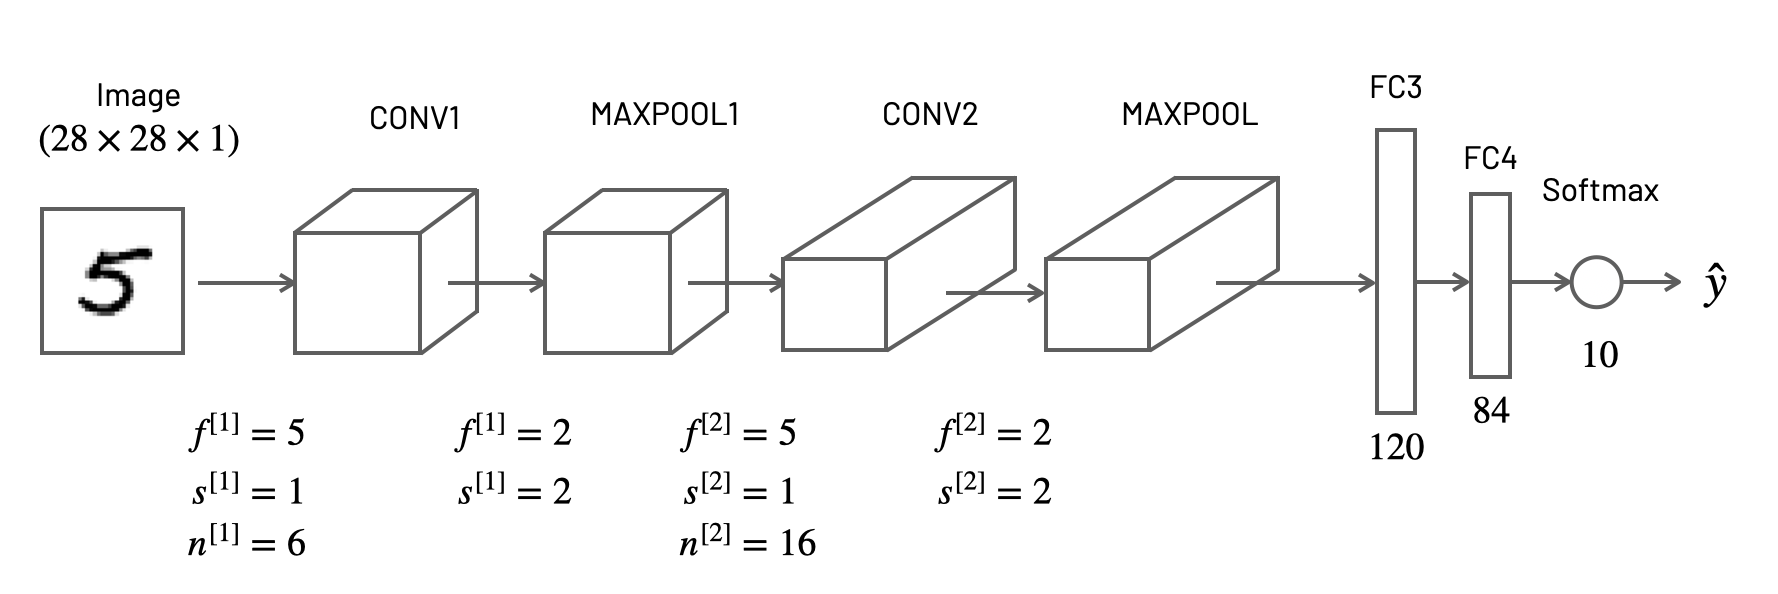


In [ ]:
class LeNet5(torch.nn.Module):
    def __init__(self):
        """
        Inicializa as camadas LeNet-5.
        """
        super(LeNet5, self).__init__()
        pass

    def forward(self, x):
        """
        Executa a passagem direta do LeNet-5

        Argumentos:
        x ​​(torch.Tensor): mini-lote de tamanho (tamanho_do_lote, canais_de_entrada, altura_de_entrada, largura_de_entrada)

        Retorna:
        torch.Tensor: logits (saída da última camada sem softax) de tamanho (tamanho_do_lote, 10)
        """
        pass

In [ ]:
# define a semente aleatória
torch.manual_seed(42)

# cria uma instância do seu modelo LeNet5
model = LeNet5()

# seleciona um único exemplo do conjunto de teste
example_image, example_label = next(iter(test_loader))
example_image = example_image[0]  # pega a primeira imagem do lote
example_label = example_label[0]

# passe o exemplo pelo modelo
output = model(example_image.unsqueeze(0))  # Add a batch dimension

# obtém as classes preditas
predicted_class = torch.argmax(output).item()

# imprime os resultados
print(f"Exemplo do rótulo da imagem: {example_label}")
print(f"Classe predita: {predicted_class}")

# você também pode imprimir as probabilidades de saída se precisar
print(f"Probabilidades de saída: {torch.nn.functional.softmax(output, dim=1)}")

**Resultados Esperados:**
<table style="width:50%">
  <tr>
    <td>Exemplo do rótulo da imagem</td>
    <td>7</td>
  </tr>
  <tr>
    <td>Classe predita</td>
    <td>5</td>
  </tr>
    <tr>
    <td>Probabilidades de saída</td>
    <td>[[4.4402e-06, 4.9075e-10, 2.3634e-02, 1.0730e-10, 1.3650e-07, 9.6639e-01, 2.9830e-03, 9.2747e-04, 6.0458e-03, 1.3411e-05]]</td>
  </tr>
</table>

## **Parte 3: Treinamento**

Agora que você definiu seu LeNet-5, é hora de treiná-lo com a descida gradiente de minilote. Preencha a função `train` acima especificando um [otimizador de Adam](https://pytorch.org/docs/stable/optim.html), uma função de perda de [Entropia Cruzada Categórica](https://pytorch.org/docs/stable/nn.html#loss-functions) (também chamada de critério). Em seguida, escreva o laço para iterar sobre o número de épocas e, dentro do laço de épocas, escreva o laço para iterar sobre o número de lotes. No Pytorch, o carregador de dados é um iterador, então você pode iterar em cada minilote com `for (x_b, y_b) in train_loader`. Para cada lote:

1. Redefina os gradientes com [torch.optim.Optimizer.zero_grad](https://pytorch.org/docs/stable/generated/torch.optim.Optimizer.zero_grad.html).
2. Execute a propagação das entradas para o minilote atual $x^{i}$ para obter a previsão $y^{i}$.
3. Calcule a perda com o objeto `critetion`.
4. Execute a retropropagação dos erros a partir do valor de perda calculado na etapa anterior (3.).
5. Atualize os pesos do modelo com [torch.optim.Optimizer.step](https://pytorch.org/docs/stable/generated/torch.optim.Optimizer.step.html).
6. Imprima a perda média após cada 100 minilotes.

In [ ]:
def train(model, train_loader, epochs=5, lr=0.001):
    """
    Treina o modelo com o otimizador de Adam no conjunto de treinamento

    Argumentos:
    model(torch.nn.Module): o modelo a ser treinado
    train_loader(torch.utils.data.DataLoader): o conjunto de treinamento
    épocas(int): número de épocas
    lr(float): taxa de aprendizado

    Retorna:
    perdas(lista): lista de perdas médias a cada 100 lotes
    """
    model.train()

    losses = []

    return losses

In [ ]:
# define a semente aleatória
torch.manual_seed(42)

# instancia e treina o modelo
model = LeNet5()

t1 = time.perf_counter()
losses = train(model, train_loader, epochs=5)
t2 = time.perf_counter()
print(f'Tempo de treino: {t2 - t1:.2f}s')

In [ ]:
# imprime um gráfico com as perdas
plt.plot(losses)
plt.xlabel("A cada 100 minilotes")
plt.ylabel("Perda")
plt.title("Curva de Aprendizado")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

**Resultados Esperados**


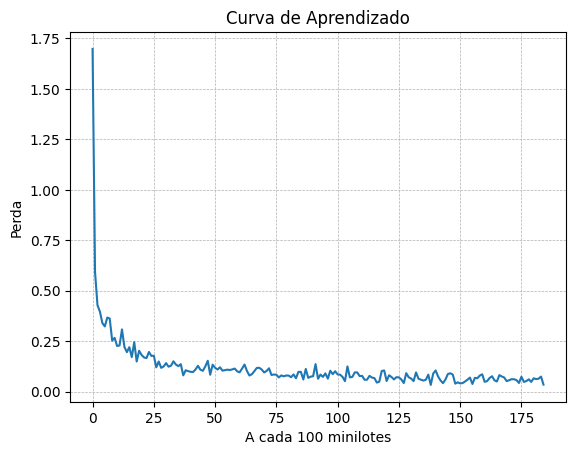

## **Parte 4: Avaliação**

A última etapa é avaliar seu modelo. O MNIST é um conjunto de dados **balanceado** e todas as classes têm a mesma importância, portanto, podemos usar a **acurácia** para esta tarefa. Implemente a seguinte função para calcular a precisão do seu LeNet-5 no conjunto de teste MNIST.

In [ ]:
def evaluate(model, test_loader):
    """
    Calcula a precisão do modelo no conjunto de teste.

    Argumentos:
    model(torch.nn.Module): O modelo a ser avaliado.
    test_loader(torch.utils.data.DataLoader): O carregador de dados para o conjunto de teste.

    Retorna:
    float: A precisão do modelo no conjunto de teste.
    """
    model.eval()
    pass

In [ ]:
# avalie o modelo
accuracy = evaluate(model, test_loader)
print(f'Acurácia no conjunto de teste: {accuracy:.2f}%')

**Resultados Esperados:**
<table style="width:50%">
  <tr>
    <td>Acurácia no conjunto de teste</td>
    <td>97.91%</td>
  </tr>
</table>